# W07 - Class Assignment
# Data Mining (Kamis)
W07 - 0706022310028 - Jevon Ivander K

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install kneed
from kneed import KneeLocator
import seaborn as sns

# Part A: Data Understanding, Cleaning, Visualizations

## 1. Load data; show first rows, shape, .info(), .describe() and give the insight.

In [2]:
# load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/mall_customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


The dataset contains information about mall customers, including their customer ID, gender, age, annual income (in thousands of dollars), and a spending score (on a scale of 1 to 100).

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


The data is complete with no missing values, and provides a good basis for understanding customer demographics and spending habits, which can be used for customer segmentation.

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
# rename the Annual Income (k$)	column & Spending Score (1-100) column
df = df.rename(columns={"Annual Income (k$)": "AnnualIncome"})
df = df.rename(columns={"Spending Score (1-100)": "SpendingScore"})
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


The columns Annual Income (k$) and Spending Score (1-100) were renamed to AnnualIncome and SpendingScore to make them easier to call in Python code. Column names containing spaces or special characters like `(` and `)` require different syntax when accessed (e.g., using `df['Annual Income (k$)']`), while column names without spaces and special characters can be accessed directly using dot notation (e.g., `df.AnnualIncome`), which makes the code more concise and readable.

## 2. Check & handle missing values / duplicates.

In [6]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())

Missing values per column:
CustomerID       0
Gender           0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64

Number of duplicate rows:
0


There is no missing and duplicate values, but we will check it more deeply by checking its unique values to check whether there is unknown values or no.

In [7]:
# show unique values from dataset
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'CustomerID': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175,

Based on the unique values shown, the data appears clean and consistent within each column, with no unexpected entries or unknown values. Based on the unique values, the data is already good and there are no unknown values.

## 3. Make 3 insightful visualizations and give the explanations.

I Will make 6 for extra :)

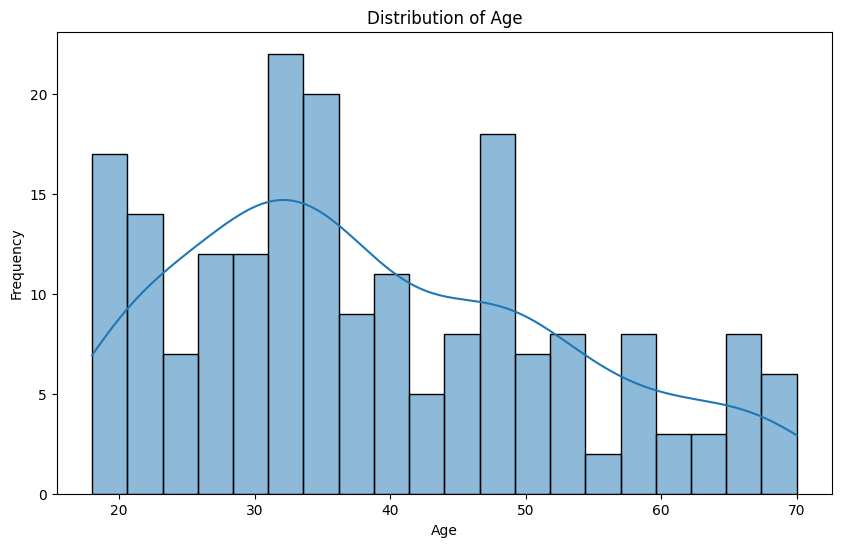

In [8]:
# Visualization: Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

This histogram shows the distribution of customer ages. The distribution appears to be somewhat skewed towards younger-middle ages, with a peak in the 30-35 age range. This suggests that a significant portion of the customer base is relatively young.

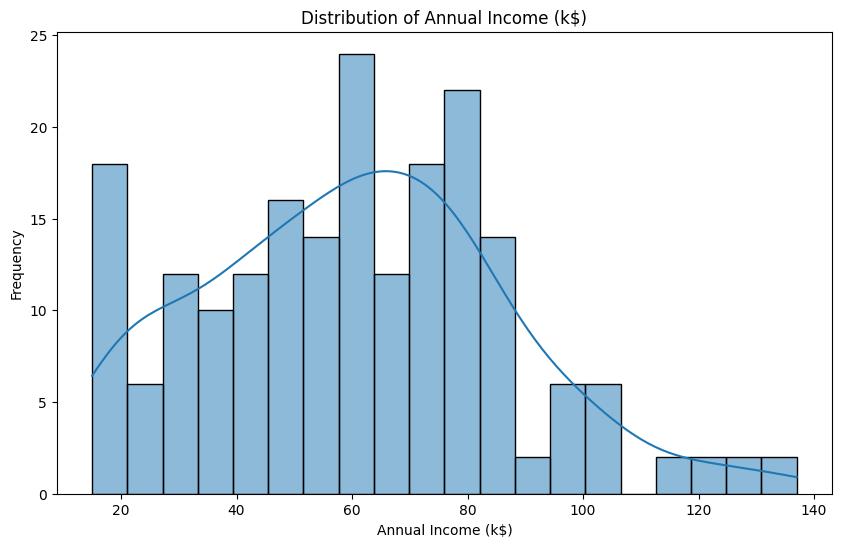

In [9]:
# Visualization: Distribution of Annual Income
plt.figure(figsize=(10, 6))
sns.histplot(df['AnnualIncome'], bins=20, kde=True)
plt.title('Distribution of Annual Income (k$)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.show()


This histogram displays the distribution of annual income among customers. The distribution seems to be somewhat spread out, with a concentration in the 40k-85k range. There are also some customers with higher incomes, indicating a diverse income range within the customer base

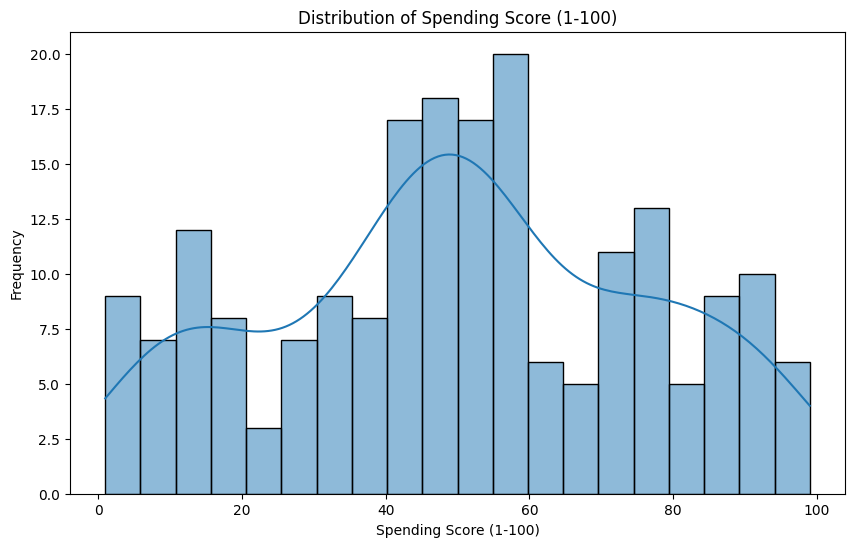

In [13]:
# Visualization: Distribution of Spending Score
plt.figure(figsize=(10, 6))
sns.histplot(df['SpendingScore'], bins=20, kde=True)
plt.title('Distribution of Spending Score (1-100)')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.show()

This histogram displays the distribution of spending scores among customers. The distribution appears to be relatively uniform across the range of 1 to 100, with slight peaks in the 40-60 range. This suggests that customers have a diverse range of spending habits, with some tendency towards moderate spending scores.

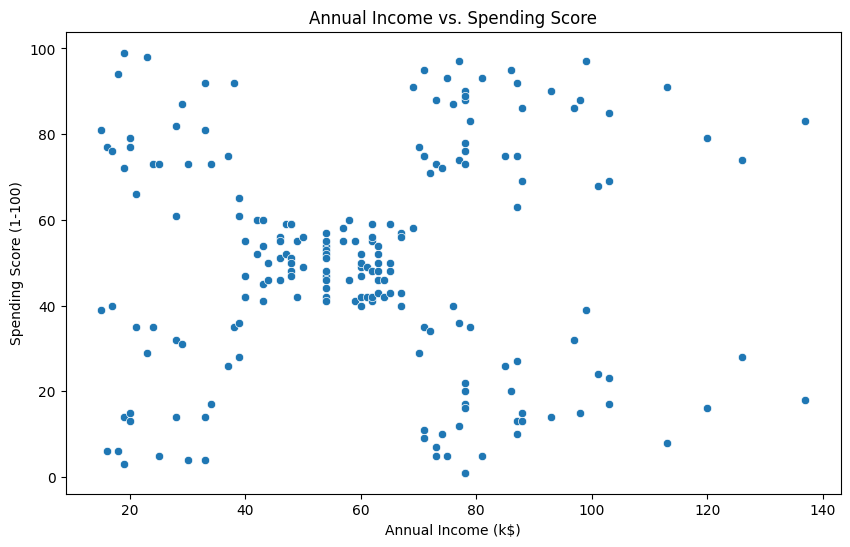

In [10]:
# Visualization: Scatter Plot of Annual Income vs. Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AnnualIncome', y='SpendingScore', data=df)
plt.title('Annual Income vs. Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

This scatter plot visualizes the relationship between annual income and spending score. We can observe potential clusters of customers. For instance, there appears to be a group with high income and high spending, another with low income and low spending, and perhaps groups with high income and low spending, and low income and high spending. This plot is particularly useful for identifying potential customer segments for targeted marketing.

In a single paragraph:

The scatter plot of Annual Income versus Spending Score shows no clear linear relationship, but instead displays several distinct **customer clusters**, indicating that detailed market segmentation is necessary. The key insights reveal highly valuable segments like the **Affluent Spenders** (high income, high score) and the conservative **Frugal Elite** (high income, low score), alongside the impulsive **Spendthrifts** (low income, high score) and budget-conscious shoppers. The core takeaway is that spending behavior is complex and **not solely determined by income**, as customers across the income spectrum exhibit both high and low spending habits; therefore, marketing strategies must be specifically **tailored** to the unique motivations, risk profiles, and potential value of each identified customer group.

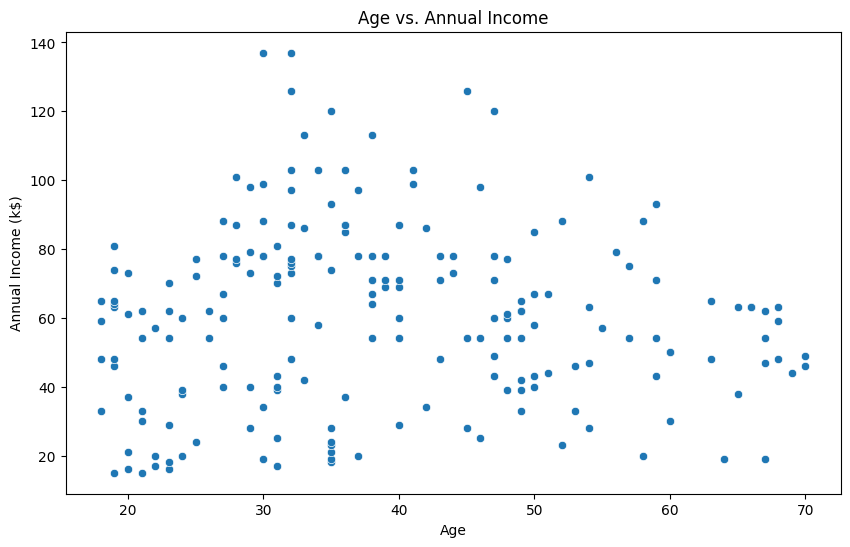

In [11]:
# Visualization: Scatter Plot of Age vs. Annual Income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='AnnualIncome', data=df)
plt.title('Age vs. Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

This scatter plot shows the relationship between age and annual income. There doesn't appear to be a strong linear correlation between age and annual income. Income levels are spread across different age groups.

The scatter plot depicting the relationship between **Age** and **Annual Income (k\$ - thousands of dollars)** shows **no discernable linear trend or correlation**. Unlike the previous spending score plot, the data points are widely scattered across the entire age range (from approximately 18 to 70) and income range (from about \$15k to \$140k). This is not strong enough to indicate that income reliably increases or decreases with age. The primary insight is that **age is a poor predictor of annual income** for this particular customer dataset, suggesting that segmentation based on income should rely more heavily on factors other than the customer's age.

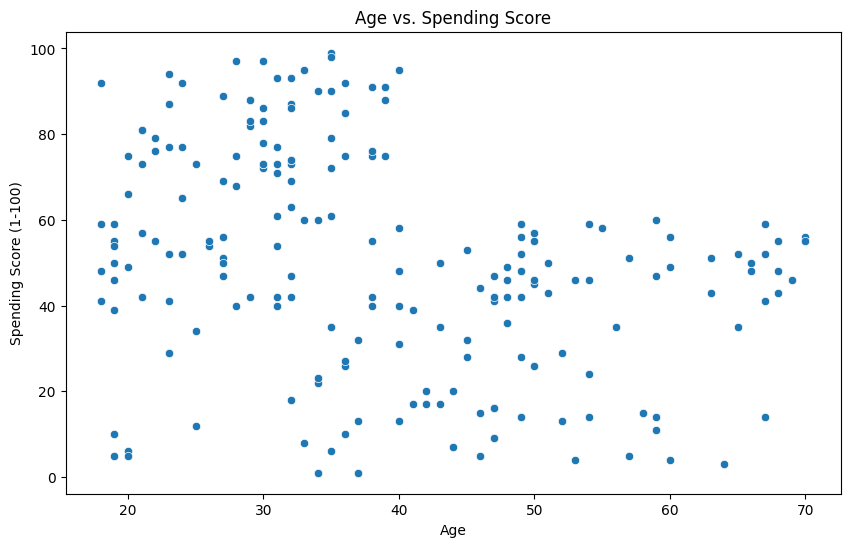

In [12]:
# Visualization: Scatter Plot of Age vs. Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='SpendingScore', data=df)
plt.title('Age vs. Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

This scatter plot visualizes the relationship between age and spending score. Younger customers seem to have a wider range of spending scores, while older customers tend to have lower spending scores. There might be potential segments based on age and spending behavior.

The scatter plot illustrating the relationship between **Age** and **Spending Score (1-100)** reveals a distinct, non-linear pattern suggesting that **spending habits are highly dependent on age**. The primary insight is that **younger customers (under 40)** exhibit the highest variation in spending, forming a large cluster with scores ranging from very low to very high, yet with a significant concentration of **high spenders (scores 70-100)**. Conversely, **older customers (over 40)** tend to have a **more moderate and lower average spending score**, with the majority of their scores clustered in the middle range (40-60) and very few high scores. This indicates that marketing efforts targeting high-spending customers should primarily focus on the younger demographic, while those targeting older customers should rely on strategies related to consistent, moderate purchases.

In [14]:
# create new dataframe that consist only annual income and spending score
df = df[['Gender', 'Age', 'AnnualIncome', 'SpendingScore']]
df.head()

,Gender,Age,AnnualIncome,SpendingScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


The CustomerID column was excluded because it is a unique identifier for each customer and does not provide relevant information for customer segmentation analysis based on characteristics like income and spending score. Since each CustomerID value is unique, this column would not contribute to identifying patterns or groupings in the data.

# Part B: Data Transformation

## 1. Encoding

In [ ]:
# Encoding the 'Gender' column using one-hot encoding
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# Display the first few rows of the dataframe after encoding
display(df.head())

Encode Gender because it is the only categorical column here

## 2. Scaling: standardize numeric features used in clustering and explain why scaling is needed for distance-based methods.

,Age,AnnualIncome,SpendingScore
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


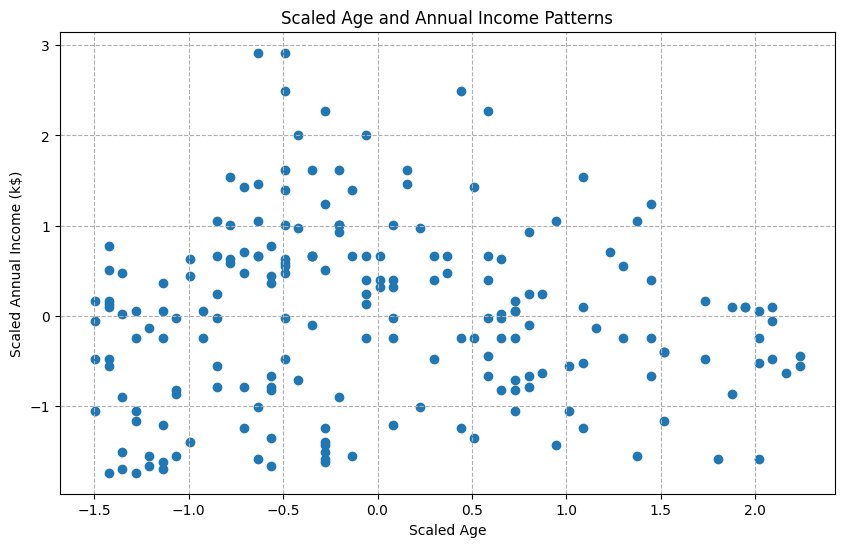

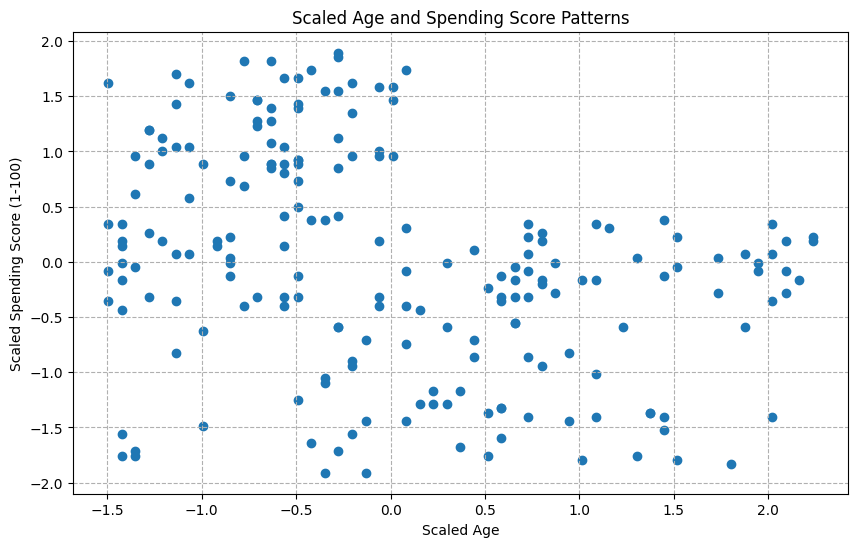

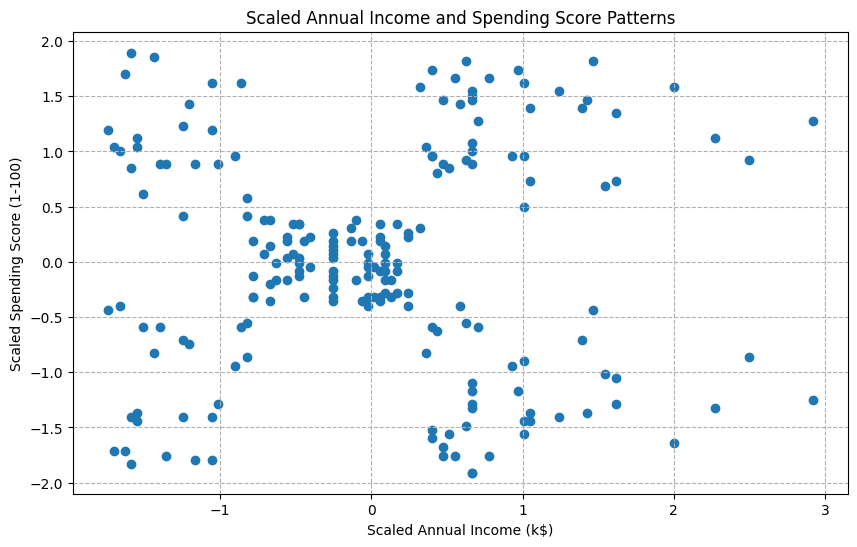

In [20]:
# scale dataset with standard scaler

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# Select only numerical columns for scaling
df_sc_scaled = pd.DataFrame(sc.fit_transform(df[['Age', 'AnnualIncome', 'SpendingScore']]), columns=[ 'Age', 'AnnualIncome', 'SpendingScore'])

display(df_sc_scaled.head())

# Visualization: Scaled Age vs. Annual Income
plt.figure(figsize=(10, 6))
plt.scatter(df_sc_scaled["Age"], df_sc_scaled["AnnualIncome"])
plt.xlabel("Scaled Age")
plt.ylabel("Scaled Annual Income (k$)")
plt.grid(axis='both', linestyle='--')
plt.title("Scaled Age and Annual Income Patterns")
plt.show()

# Visualization: Scaled Age vs. Spending Score
plt.figure(figsize=(10, 6))
plt.scatter(df_sc_scaled["Age"], df_sc_scaled["SpendingScore"])
plt.xlabel("Scaled Age")
plt.ylabel("Scaled Spending Score (1-100)")
plt.grid(axis='both', linestyle='--')
plt.title("Scaled Age and Spending Score Patterns")
plt.show()

# Visualization: Scaled Annual Income vs. Spending Score
plt.figure(figsize=(10, 6))
plt.scatter(df_sc_scaled["AnnualIncome"], df_sc_scaled["SpendingScore"])
plt.xlabel("Scaled Annual Income (k$)")
plt.ylabel("Scaled Spending Score (1-100)")
plt.grid(axis='both', linestyle='--')
plt.title("Scaled Annual Income and Spending Score Patterns")
plt.show()

Scaling is crucial for distance-based clustering methods like K-Means because these algorithms calculate the distance between data points to form clusters. If features have different scales (e.g., age in years vs. annual income in thousands of dollars), the feature with the larger scale will dominate the distance calculation, leading to biased clustering results. Standardizing the features ensures that each feature contributes equally to the distance calculation, resulting in more accurate and meaningful clusters.

Looking at the scaled scatter plots:

* Scaled Age vs. Annual Income: Similar to the unscaled plot, there's no strong linear relationship between scaled age and scaled annual income. The data points are still scattered, reinforcing that age alone is not a strong predictor of income.
* Scaled Age vs. Spending Score: The pattern observed in the unscaled plot is maintained. Younger customers (lower scaled age) show a wider range of scaled spending scores, while older customers (higher scaled age) tend to have lower scaled spending scores. This confirms the potential for age-based segmentation related to spending habits.
* Scaled Annual Income vs. Spending Score: This scaled plot also shows similar patterns to the unscaled version, with visible clusters. The scaling has normalized the axes, but the relative positions and groupings of the data points remain, highlighting the potential for income and spending-based customer segmentation.


# Part C: Choosing K

In [21]:
from sklearn.cluster import KMeans

## 1. Elbow Method: Plot WCSS vs K (K = 2-10) and discuss the “elbow”.

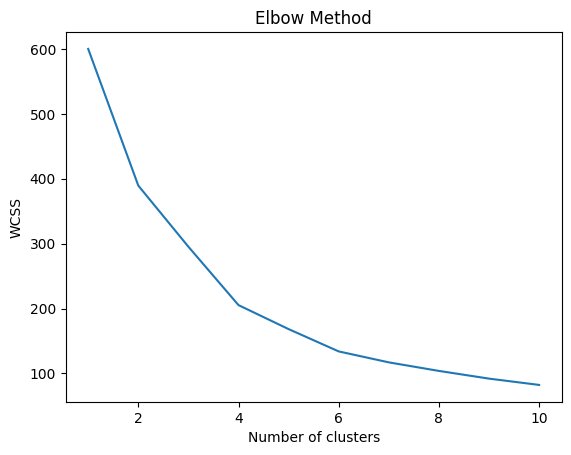

In [22]:
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_sc_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters        WCSS
0                   1  600.000000
1                   2  389.386189
2                   3  295.212246
3                   4  205.225147
4                   5  168.247580
5                   6  133.868334
6                   7  117.011555
7                   8  103.828578
8                   9   91.956839
9                  10   82.245745


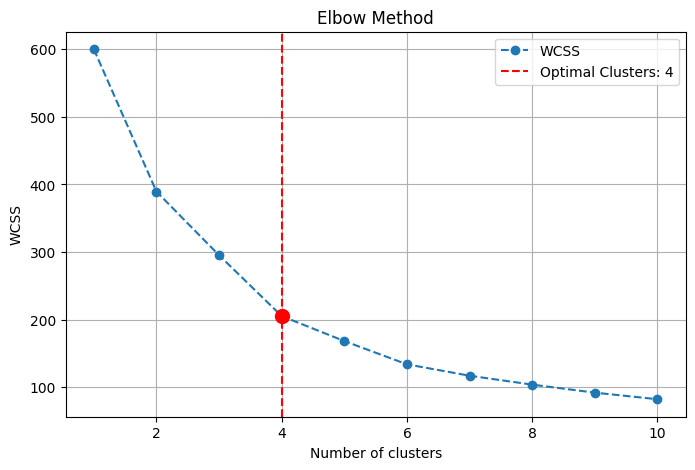

The optimal number of clusters is: 4


In [24]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

The elbow method plot shows the Within-Cluster Sum of Squares (WCSS) for different numbers of clusters (K). The "elbow point" in the graph represents the value of K where the rate of decrease in WCSS slows down significantly. This point is often considered the optimal number of clusters because adding more clusters beyond this point does not substantially reduce the WCSS, suggesting diminishing returns in terms of improving the clustering. In this case, the elbow appears to be at K=4, which is also indicated by the KneeLocator. This suggests that 4 is the optimal number of clusters for this dataset based on the elbow method.

## 2. Conclude the final K with a one-paragraph.

Based on the elbow method, where the rate of decrease in the Within-Cluster Sum of Squares (WCSS) significantly slows down, the optimal number of clusters for this dataset appears to be 4. This is the point where adding more clusters provides diminishing returns in terms of reducing the WCSS and improving the clustering structure.

# Part D: Modeling with K-Means

## 1. Fit K-Means with the chosen K (random_state fixed)

In [25]:
# Fit K-Means to the data with the optimal number of K cluster = 4
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_sc_scaled)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster'] = clusters

# Show the df
df.head()

,Gender,Age,AnnualIncome,SpendingScore,KMeans_Cluster
0,Male,19,15,39,3
1,Male,21,15,81,2
2,Female,20,16,6,3
3,Female,23,16,77,2
4,Female,31,17,40,3


## 2. Visualize clusters and their characteristics (min. 2 visualizations) you can pick any two-D or three-D views.

/tmp/ipython-input-1161615579.py:4: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x = "Age", y = "AnnualIncome", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_sc_scaled, s = 60)


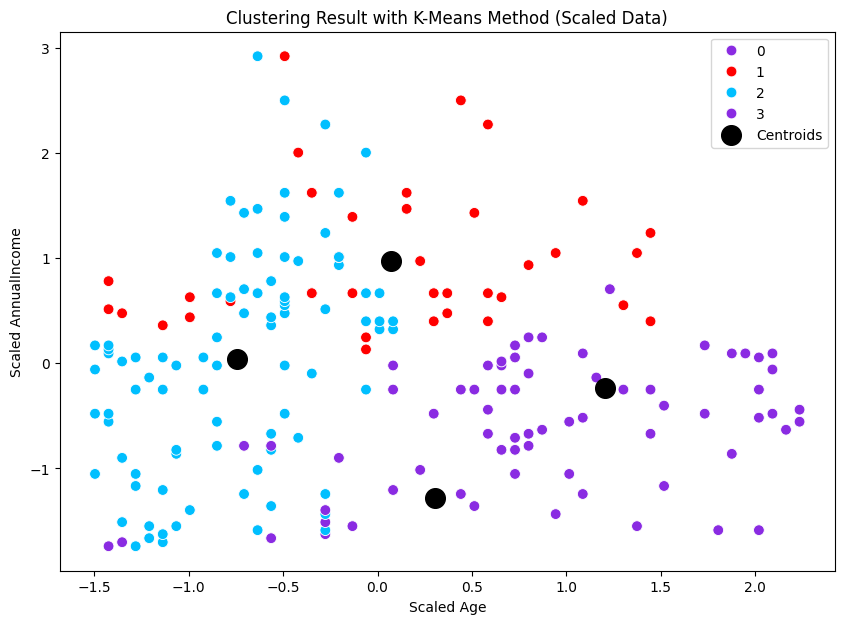

In [29]:
# visualize the result using scater chart on scaled data
plt.figure(figsize=(10,7))

sns.scatterplot(x = "Age", y = "AnnualIncome", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_sc_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="black", label="Centroids")
plt.xlabel("Scaled Age")
plt.ylabel("Scaled AnnualIncome")
plt.title("Clustering Result with K-Means Method (Scaled Data)")
plt.legend()
plt.show()

Scaled Age vs. Annual Income: The scatter plot depicting the relationship between Scaled Age and Scaled Annual Income shows no discernable linear trend or correlation. Similar to the unscaled plot, the data points are widely scattered across both the scaled age and scaled income ranges, indicating that scaled income levels are spread across different scaled age groups and there is no strong indication that income reliably increases or decreases with age in this dataset.

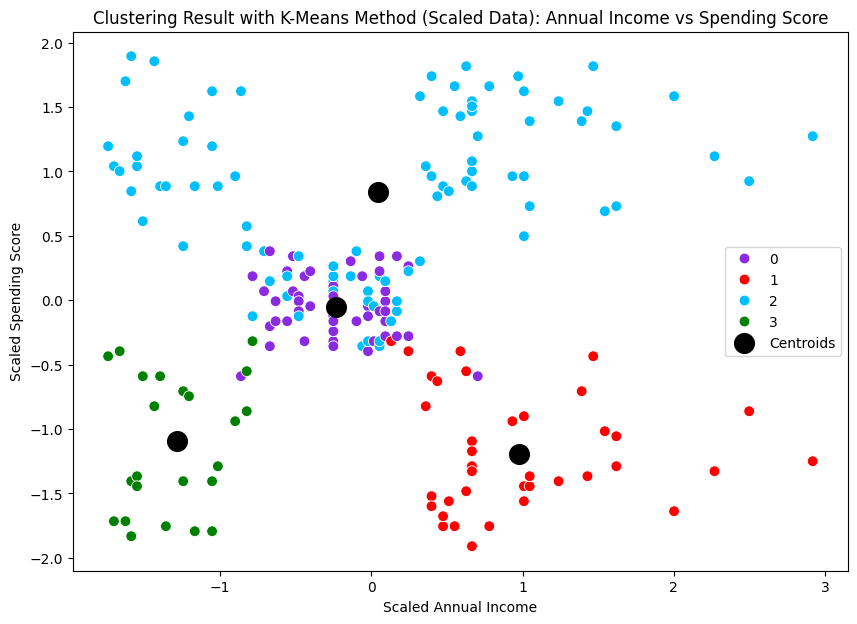

In [30]:
# visualize the result using scatter chart on scaled data - Annual Income vs Spending Score
plt.figure(figsize=(10,7))

sns.scatterplot(x = "AnnualIncome", y = "SpendingScore", hue=clusters, palette=["blueviolet", "red", "deepskyblue", "green"], data=df_sc_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=200, c="black", label="Centroids")
plt.xlabel("Scaled Annual Income")
plt.ylabel("Scaled Spending Score")
plt.title("Clustering Result with K-Means Method (Scaled Data): Annual Income vs Spending Score")
plt.legend()
plt.show()

Scaled Annual Income vs. Spending Score: This scaled scatter plot visualizes the relationship between Scaled Annual Income and Scaled Spending Score. It clearly shows distinct customer clusters, reinforcing the need for detailed market segmentation. The primary insight reveals highly valuable segments such as customers with high scaled income and high scaled spending, and another group with low scaled income and low scaled spending. There are also apparent groups with high scaled income and low scaled spending, and low scaled income and high scaled spending.

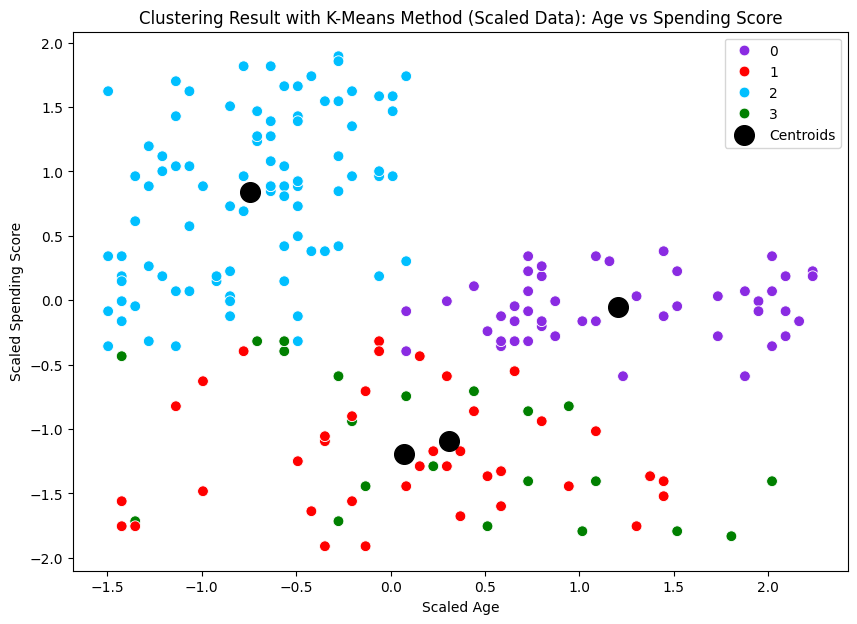

In [31]:
# visualize the result using scatter chart on scaled data - Age vs Spending Score
plt.figure(figsize=(10,7))

sns.scatterplot(x = "Age", y = "SpendingScore", hue=clusters, palette=["blueviolet", "red", "deepskyblue", "green"], data=df_sc_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], s=200, c="black", label="Centroids")
plt.xlabel("Scaled Age")
plt.ylabel("Scaled Spending Score")
plt.title("Clustering Result with K-Means Method (Scaled Data): Age vs Spending Score")
plt.legend()
plt.show()

Scaled Age vs. Spending Score: The scatter plot illustrating the relationship between Scaled Age and Scaled Spending Score reveals a distinct pattern suggesting that spending habits are highly dependent on age. Younger customers (lower scaled age) exhibit a wider variation in scaled spending, including a concentration of high scaled spenders, while older customers (higher scaled age) tend to have more moderate and lower average scaled spending scores, with very few high scaled scores. This indicates that scaled age is a relevant factor in understanding spending behavior for this dataset.

**Overall**

Based on the scatter plots, we can observe initial characteristics of the 4 clusters. The 'Scaled Annual Income vs. Spending Score' plot shows clear distinctions: one cluster has low income and low spending, another has high income and high spending, a third has high income but low spending, and the fourth has low income but high spending. The 'Scaled Age vs. Annual Income' and 'Scaled Age vs. Spending Score' plots suggest that age also plays a role, with younger customers showing more varied spending habits compared to older customers who tend to have more moderate spending scores. To get a more detailed understanding of each cluster's characteristics, we will need to create a cluster summary table.

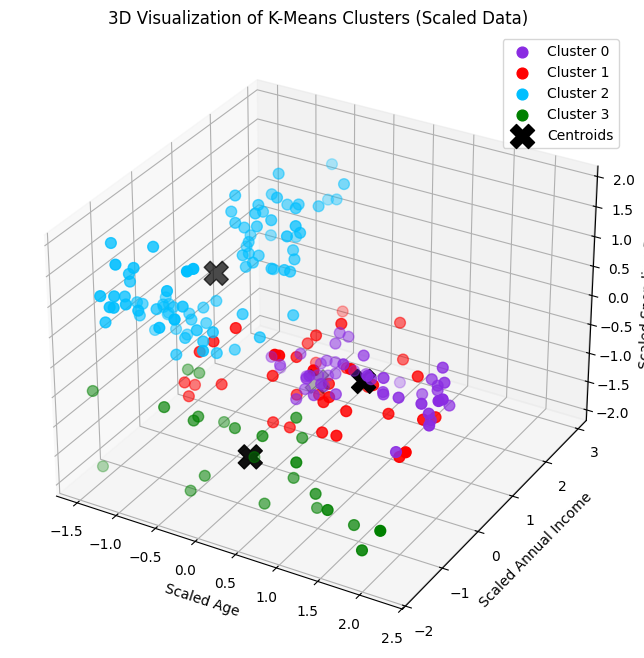

In [33]:
from mpl_toolkits.mplot3d import Axes3D

# 3D visualization of clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each cluster
colors = ["blueviolet", "red", "deepskyblue", "green"]
for cluster_id in sorted(df['KMeans_Cluster'].unique()):
    cluster_data = df_sc_scaled[df['KMeans_Cluster'] == cluster_id]
    ax.scatter(cluster_data['Age'], cluster_data['AnnualIncome'], cluster_data['SpendingScore'],
               c=colors[cluster_id], label=f'Cluster {cluster_id}', s=60)

# Plot centroids
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],
           s=300, c='black', marker='X', label='Centroids')

ax.set_xlabel('Scaled Age')
ax.set_ylabel('Scaled Annual Income')
ax.set_zlabel('Scaled Spending Score')
ax.set_title('3D Visualization of K-Means Clusters (Scaled Data)')
ax.legend()
plt.show()

This 3D scatter plot provides a visualization of the four K-Means clusters in a three-dimensional space defined by Scaled Age, Scaled Annual Income, and Scaled Spending Score. We can observe how the clusters are separated based on these three features simultaneously. The plot helps to visually confirm the distinct groupings of customers identified by the clustering algorithm and how the centroids are positioned within these groups. This visualization gives a more comprehensive view of the cluster separation than the 2D plots alone.

* Cluster 2 (Cyan/Blue) is clearly isolated in the region of low Scaled Age (around -1.5 to -1.0), and has a high variation in Scaled Income and Spending Score. This group represents Younger Customers whose spending and income vary widely, confirming the insight from the 2D Age vs. Spending Score plot.

* Cluster 3 (Green) is located in a region of high Scaled Age (around -1.5 to 2.0), high Scaled Annual Income (around -2.0 to 2.0), but appears to have low Scaled Spending Scores (positioned towards the lower end of the third axis). This group likely represents the Older, High-Income, Frugal segment.

* Cluster 0 (Purple) and Cluster 1 (Red) occupy the central regions, primarily characterized by Moderate to Low Scaled Age and Moderate to High Scaled Annual Income. Their separation likely depends on their Scaled Spending Score (but most likely be the same to)

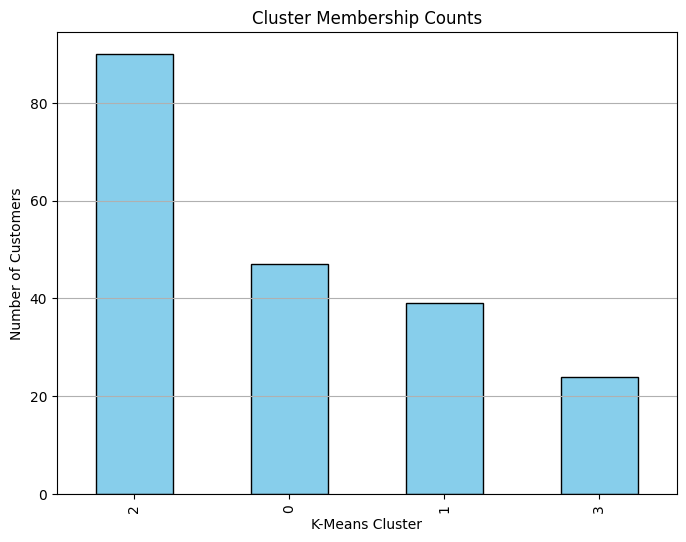

In [28]:
cluster_counts = df['KMeans_Cluster'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()

In [32]:
# Calculate the number of customers in each cluster
cluster_counts = df['KMeans_Cluster'].value_counts()

# Display the cluster counts
print("Number of customers per cluster:")
print(cluster_counts)

Number of customers per cluster:
KMeans_Cluster
2    90
0    47
1    39
3    24
Name: count, dtype: int64


This bar chart shows the number of customers assigned to each of the four K-Means clusters. The counts for each cluster are: Cluster 2 has the most customers (90), followed by Cluster 0 (47), Cluster 1 (39), and Cluster 3 (24). This indicates that the clusters have varying sizes, with one cluster being significantly larger than the others. Understanding the size of each cluster is important for targeted marketing and resource allocation.

# Part E: Cluster Profiling & Insights

Create a cluster summary table (mean/median, mode, min-max) per cluster for:

* Age, Annual Income, Spending Score, and Gender Write short personas (2-4 bullets per cluster) and managerial implications, e.g.: Targeting (premium vs value), campaign channels, pricing/offer design, retention ideas.

In [43]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df.groupby(clusters).agg({'Gender': [lambda x: x.mode()[0] if not x.mode().empty else None, 'min', 'max'],
                                              'Age': ['mean', 'min', 'max'],
                                              'AnnualIncome': ['mean', 'min', 'max'],
                                              'SpendingScore': ['mean', 'min', 'max']})

cluster_summary = cluster_summary.rename_axis('KMeans_cluster')

# Rename the lambda column to 'mode'
cluster_summary.rename(columns={'<lambda_0>': 'mode'}, level=1, inplace=True)

cluster_summary

Gender                      Age         AnnualIncome           \
                  mode     min   max       mean min max         mean min  max   
KMeans_cluster                                                                  
0               Female  Female  Male  55.638298  40  70    54.382979  38   79   
1                 Male  Female  Male  39.871795  19  59    86.102564  64  137   
2               Female  Female  Male  28.500000  18  40    61.677778  15  137   
3               Female  Female  Male  43.125000  19  67    26.958333  15   40   

               SpendingScore          
                        mean min max  
KMeans_cluster                        
0                  48.851064  35  60  
1                  19.358974   1  42  
2                  71.766667  41  99  
3                  22.083333   3  42

## Cluster Profiling & Managerial Implications

Based on the cluster summary table, here are the profiles and managerial implications for each of the four clusters:

**Cluster 0**

*   **Profile:** This cluster primarily consists of older customers (mean age ~55) with moderate annual income (mean ~54k) and moderate spending scores (mean ~48). The majority gender is Female.
*   **Managerial Implications:** Target this group with products and services that cater to a more mature demographic. Focus on value and reliability in marketing messages. Consider loyalty programs for repeat business.

Implications:
- Focus on stability and reliability. This group isn't driven by extremes in price or luxury.
- Offer value-for-money products that emphasize durability, practicality, and customer support.
- Since they are older, traditional marketing channels (like email, direct mail, or local media) might be effective, focusing on trust and established brand reputation.
- They are likely consistent, reliable customers, making them suitable for standard loyalty programs that offer small, continuous rewards.

**Cluster 1**

*   **Profile:** This cluster includes customers with relatively higher annual income (mean ~86k) but lower spending scores (mean ~19). Their age range is broad (mean ~40). The majority gender is Male.
*   **Managerial Implications:** These are potentially high-income, low-spending customers. Marketing efforts could focus on highlighting the quality and long-term value of products. Strategies to encourage increased spending could be explored, such as exclusive offers or premium product lines.


Implications:
- This is the Frugal Elite. Their high income is not being spent here. The core challenge is to overcome their high resistance to spending.
- Target them with high-quality, long-term investment products or services that demonstrate significant return on investment (ROI) or cost savings over time.
- Marketing must focus on logic, fact-based evidence, and financial security, not impulse or emotion.
- Avoid discounting; instead, emphasize exclusivity, lasting value, and quality that justifies the price.

**Cluster 2**

*   **Profile:** This is the largest cluster, characterized by younger customers (mean age ~28) with moderate to high annual income (mean ~61k) and high spending scores (mean ~71). The majority gender is Female.
*   **Managerial Implications:** This is a highly valuable segment with high spending potential. Target them with trendy and new products. Digital marketing and social media campaigns would likely be effective. Consider loyalty programs and personalized offers to maintain high engagement.

Implications:
- This is the High-Value, Impulsive segment, often the most profitable in the short term.
- Focus on trendy, experiential, and aspirational products. They value immediate gratification and being up-to-date.
- Use digital, social media, and influencer marketing for instant engagement and high visibility.
- Offer tiered premium options and use limited-time offers or flash sales to encourage immediate purchase. High credit or flexible payment options may be appealing.

**Cluster 3**

*   **Profile:** This cluster consists of customers with lower annual income (mean ~27k) and lower spending scores (mean ~22). Their age range is broad (mean ~43). The majority gender is Female.
*   **Managerial Implications:** This is a price-sensitive segment. Focus on affordable products and promotions. Value-based marketing messages would be most effective. Consider offering discounts and bundles to attract and retain these customers.

Implications:
- This is the Budget-Conscious segment. They are highly sensitive to price.
- Target with essential, affordable products and heavy discounts or bulk savings.
- Marketing should focus strictly on value, necessity, and cost savings. Avoid emphasizing luxury or unnecessary features.
- Use highly targeted, low-cost marketing (like email newsletters) advertising sales and coupons to encourage purchase conversion.